Media: 75.25
Mediana: 75.0
Estimación de la media (μ): 75.18
Estimación de la desviación estándar (σ): 1.16


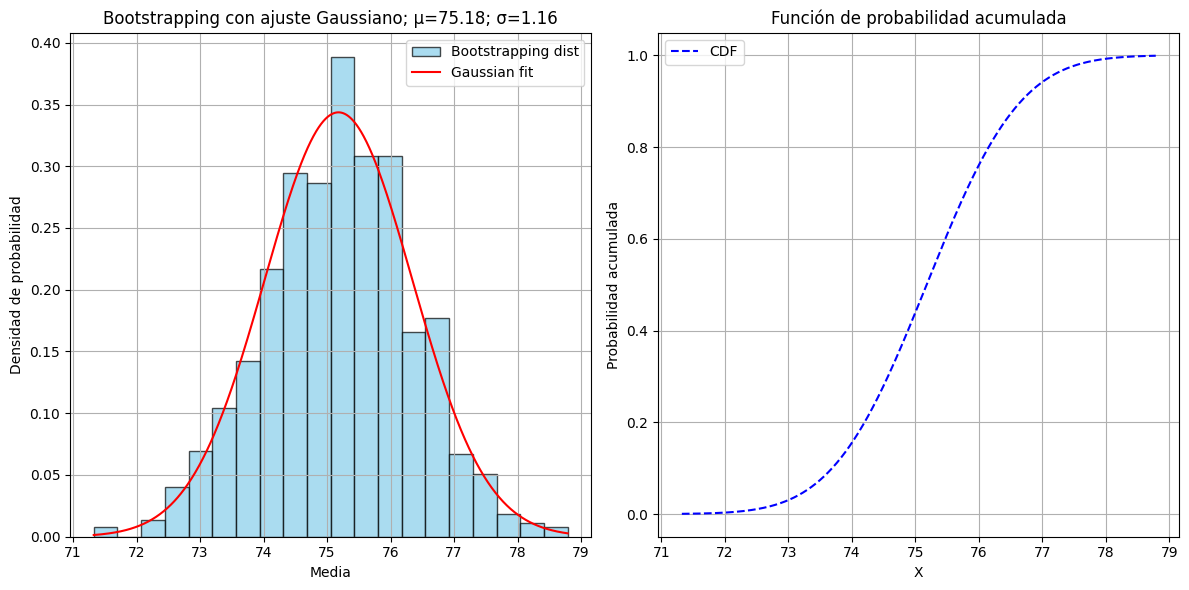

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as spo

data = np.array([
    68, 84, 75, 82, 68, 90, 62, 88, 76, 93, 73, 79, 88, 73, 60, 93, 71, 59,
    85, 75, 61, 65, 75, 87, 74, 62, 95, 78, 63, 72, 66, 78, 82, 75, 94, 77,
    69, 74, 68, 60, 96, 78, 89, 61, 75, 95, 60, 79, 83, 71, 79, 62, 67, 97,
    78, 85, 76, 65, 71, 75, 65, 80, 73, 57, 88, 78, 62, 76, 53, 74, 86, 67,
    73, 81, 72, 63, 76, 75, 85, 77
])

media = np.mean(data)
mediana = np.percentile(data, 50)

n_samples = 1000
bootstrap_means = [np.mean(random.choices(data, k=len(data))) for _ in range(n_samples)]

def Likelihood(mu,sigma,x):
    mean,std = mu,sigma
    return 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))

def JointLikelihood(params, x):
    mu, sigma = params
    return -np.sum(np.log(Likelihood(mu, sigma, x)))

p0 = np.array([media, np.std(data)])
result = spo.minimize(JointLikelihood, p0, args=(bootstrap_means))
mu_estimated, sigma_estimated = result.x

print("Media:", media)
print("Mediana:", mediana)
print(f"Estimación de la media (μ): {mu_estimated:.2f}")
print(f"Estimación de la desviación estándar (σ): {sigma_estimated:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(bootstrap_means, bins=20, color="skyblue", edgecolor="black", alpha=0.7, density=True, label="Bootstrapping dist")
x_range = np.linspace(min(bootstrap_means), max(bootstrap_means), 1000)
pdf = Likelihood(mu_estimated, sigma_estimated, x_range)
axs[0].plot(x_range, pdf, 'r-', label="Gaussian fit")
axs[0].set_title(f"Bootstrapping con ajuste Gaussiano; μ={round(mu_estimated,2)}; σ={round(sigma_estimated,2)}")
axs[0].set_xlabel("Media")
axs[0].set_ylabel("Densidad de probabilidad")
axs[0].legend()
axs[0].grid(True)

def probabilidad(a,mu,sigma):
    roots, weights = np.polynomial.legendre.leggauss(10)
    t = 0.5 * (roots+1)*(a-mu) + mu
    return 0.5 + 0.5*(a-mu)*(np.sum(weights*Likelihood(mu,sigma,t)))

cdf = np.array([probabilidad(x, mu_estimated, sigma_estimated) for x in x_range])
axs[1].plot(x_range, cdf, label="CDF", color="b",linestyle="--")
axs[1].set_title("Función de probabilidad acumulada")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Probabilidad acumulada")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()